In [1]:
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Author Q.Liu
# Date: 29/09/2017
# 
# This is part of source code for INF9305 term project part1
# 
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# standard libs
import os
import time
import numpy as np

# thrid party libs
import cv2

# private libs created by myself
from texture import *
"""
This lib mainly includs first-oder functions
and 2-order (GLCM) texture functions
---first_order_features()
---construct_first_order_feature_image() 

---get_glcm()
---glcm_measures()
---construct_glcm_feature_img()

and some other usefull functions like
---subimage()
---requantize()
---scale_image()

and colorbar display functions

This lib shoule be refactor in future to keep code neat and tidy
"""

'\nThis lib mainly includs first-oder functions\nand 2-order (GLCM) texture functions\n---first_order_features()\n---construct_first_order_feature_image() \n\n---get_glcm()\n---glcm_measures()\n---construct_glcm_feature_img()\n\nand some other usefull functions like\n---subimage()\n---requantize()\n---scale_image()\n\nand colorbar display functions\n\nThis lib shoule be refactor in future to keep code neat and tidy\n'

In [3]:
# default file paths and image-files 
output_dir = './output'
input_dir = './images'

org_file1 = os.path.join(input_dir, 'mosaic1.png')
org_file2 = os.path.join(input_dir, 'mosaic2.png')

# open texture images 
img1 = cv2.imread(org_file1,cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(org_file2,cv2.IMREAD_GRAYSCALE)


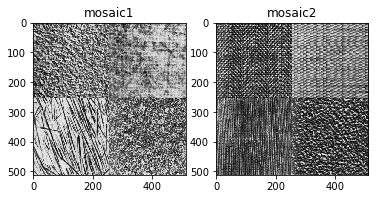

In [4]:
# display images
fig_num = 1

figure(fig_num)
fig_num += 1

subplot(1,2,1)
title('mosaic1')
imshow(img1,'gray')
subplot(1,2,2)
title('mosaic2')
imshow(img2,'gray')

In [5]:
# step1 create subimage for each texture (total 8 different textures)
subimages = ['subimages namelist']

def get_basename(pathfile='./'):
    return os.path.splitext(os.path.basename(pathfile))[0]

def create_filename(parent="./", num=1):
    suffix = get_basename(parent) # get basename for parent    
    return os.path.join(output_dir,"sub-{0}-{1}.png".format(suffix,num))

for k, patch in enumerate(subimage(org_file1), 1):
    subimg_name = create_filename(org_file1, k)
    subimages.append(subimg_name)
    cv2.imwrite(subimg_name, patch)

for k, patch in enumerate(subimage(org_file2), 1):
    subimg_name = create_filename(org_file2, k)
    subimages.append(subimg_name)
    cv2.imwrite(subimg_name, patch)
   
print('created subimages list:\n', subimages[1:])

created subimages list:
 ['./output/sub-mosaic1-1.png', './output/sub-mosaic1-2.png', './output/sub-mosaic1-3.png', './output/sub-mosaic1-4.png', './output/sub-mosaic2-1.png', './output/sub-mosaic2-2.png', './output/sub-mosaic2-3.png', './output/sub-mosaic2-4.png']


In [6]:
# display all these subimages created
sub1 = cv2.imread(subimages[1],cv2.IMREAD_GRAYSCALE)
sub2 = cv2.imread(subimages[2],cv2.IMREAD_GRAYSCALE)
sub3 = cv2.imread(subimages[3],cv2.IMREAD_GRAYSCALE)
sub4 = cv2.imread(subimages[4],cv2.IMREAD_GRAYSCALE)

first order features of texture-sub-mosaic1-1
{'min': 0, 'max': 255, 'variance': 3710.811742860591, 'mean': 123.93272399902344, 'std_dev': 60.916432453489847, 'skewness': 0.13262348035042767, 'kurtosis': -1.1908930272377334, 'entropy': 6.3339059678261087, 'energy': 0.014305692166090012, 'smoothness': 0.9997305897849148, 'coefficient': 0.49152822989648687} 

first order features of texture-sub-mosaic1-2
{'min': 0, 'max': 255, 'variance': 2317.5263213431463, 'mean': 147.87979125976562, 'std_dev': 48.140692987774351, 'skewness': -0.40414360474120636, 'kurtosis': -0.63926774054098701, 'entropy': 5.6410686519147468, 'energy': 0.024447472300380468, 'smoothness': 0.99956869154738748, 'coefficient': 0.32553936259762778} 



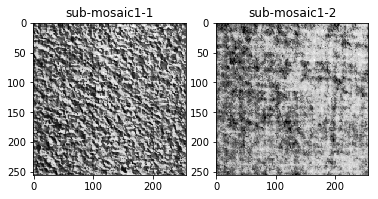

In [7]:
figure(fig_num)
fig_num += 1

subplot(1,2,1)
title(get_basename(subimages[1]))
imshow(sub1,'gray')
subplot(1,2,2)
title(get_basename(subimages[2]))
imshow(sub2,'gray')

print('first order features of texture-{0}'.format(get_basename(subimages[1])))
print(first_order_features(sub1,'ALL'),'\n')

print('first order features of texture-{0}'.format(get_basename(subimages[2])))
print(first_order_features(sub2,'ALL'),'\n')

first order features of texture-sub-mosaic1-3
{'min': 0, 'max': 255, 'variance': 4578.2055633754935, 'mean': 157.71833801269531, 'std_dev': 67.662438349319729, 'skewness': -0.66268614757414113, 'kurtosis': -1.0844529090314197, 'entropy': 5.7404351585272098, 'energy': 0.036985257640480995, 'smoothness': 0.99978162150919847, 'coefficient': 0.42900806083737286} 

first order features of texture-sub-mosaic1-4
{'min': 0, 'max': 255, 'variance': 3394.4423041155096, 'mean': 117.54673767089844, 'std_dev': 58.261842608310197, 'skewness': 0.30692497869913205, 'kurtosis': -1.1132677108514575, 'entropy': 6.3556655853826589, 'energy': 0.014197440352290869, 'smoothness': 0.99970548755937105, 'coefficient': 0.49564831625892358} 



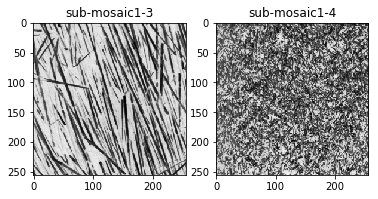

In [8]:
figure(fig_num)
fig_num += 1

subplot(1,2,1)
title(get_basename(subimages[3]))
imshow(sub3,'gray')
subplot(1,2,2)
title(get_basename(subimages[4]))
imshow(sub4,'gray')

print('first order features of texture-{0}'.format(get_basename(subimages[3])))
print(first_order_features(sub3,'ALL'),'\n')

print('first order features of texture-{0}'.format(get_basename(subimages[4])))
print(first_order_features(sub4,'ALL'),'\n')

In [9]:
sub5 = cv2.imread(subimages[5],cv2.IMREAD_GRAYSCALE)
sub6 = cv2.imread(subimages[6],cv2.IMREAD_GRAYSCALE)
sub7 = cv2.imread(subimages[7],cv2.IMREAD_GRAYSCALE)
sub8 = cv2.imread(subimages[8],cv2.IMREAD_GRAYSCALE)

first order features of texture-sub-mosaic2-1
{'min': 0, 'max': 255, 'variance': 3116.3763345917687, 'mean': 84.929412841796875, 'std_dev': 55.82451374254655, 'skewness': 0.83891666295328238, 'kurtosis': -0.15081633253679039, 'entropy': 6.2605350038417757, 'energy': 0.016723894979804754, 'smoothness': 0.99967921742751953, 'coefficient': 0.65730483556426123} 

first order features of texture-sub-mosaic2-2
{'min': 0, 'max': 255, 'variance': 2456.3491155018564, 'mean': 133.37806701660156, 'std_dev': 49.56156893704896, 'skewness': 0.031507455890651431, 'kurtosis': -1.0056334415977879, 'entropy': 5.988979201726222, 'energy': 0.017767266370356083, 'smoothness': 0.99959305741553306, 'coefficient': 0.37158709858105854} 



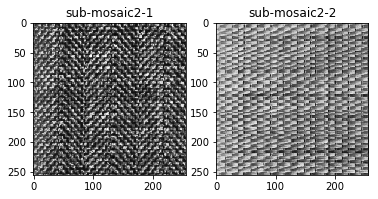

In [10]:
figure(fig_num)
fig_num += 1

subplot(1,2,1)
title(get_basename(subimages[5]))
imshow(sub5,'gray')
subplot(1,2,2)
title(get_basename(subimages[6]))
imshow(sub6,'gray')

print('first order features of texture-{0}'.format(get_basename(subimages[5])))
print(first_order_features(sub5,'ALL'),'\n')

print('first order features of texture-{0}'.format(get_basename(subimages[6])))
print(first_order_features(sub6,'ALL'),'\n')

first order features of texture-sub-mosaic2-3
{'min': 0, 'max': 221, 'variance': 1793.278395652771, 'mean': 85.1162109375, 'std_dev': 42.347117914360723, 'skewness': 0.6616028444439509, 'kurtosis': -0.014586888795385278, 'entropy': 6.1010483574450722, 'energy': 0.01828464213758707, 'smoothness': 0.99944267288597866, 'coefficient': 0.49752118248609301} 

first order features of texture-sub-mosaic2-4
{'min': 0, 'max': 234, 'variance': 3109.0805879971017, 'mean': 78.143768310546875, 'std_dev': 55.759130086445055, 'skewness': 1.0065448228726981, 'kurtosis': 0.087132270979266124, 'entropy': 6.2662311276188589, 'energy': 0.016851913649588823, 'smoothness': 0.99967846492343015, 'coefficient': 0.71354544696201172} 



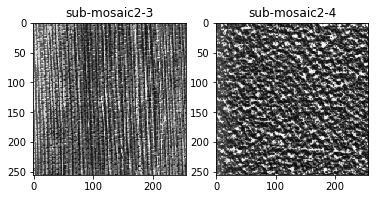

In [11]:
figure(fig_num)
fig_num += 1

subplot(1,2,1)
title(get_basename(subimages[7]))
imshow(sub7,'gray')
subplot(1,2,2)
title(get_basename(subimages[8]))
imshow(sub8,'gray')

print('first order features of texture-{0}'.format(get_basename(subimages[7])))
print(first_order_features(sub7,'ALL'),'\n')

print('first order features of texture-{0}'.format(get_basename(subimages[8])))
print(first_order_features(sub8,'ALL'),'\n')

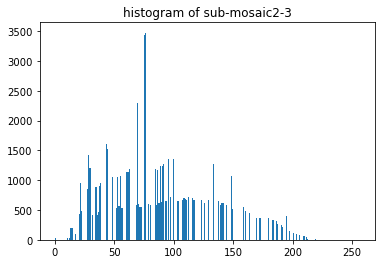

In [12]:
# histogram transforms
figure(fig_num)
fig_num += 1

title("histogram of {0}".format(get_basename(subimages[7])))
hist(sub7.ravel(),256,[0,256])
show()

# another way by using cv2 hist function
# cvHist = cv2.calcHist([sub7],[0],None,[256],[0,256])
# plot(cvHist)

In [13]:
# create first order feature images by specific sliding window

window_size = 21
neighbour = int((window_size - 1) / 2)
feature_name = 'entropy'
"""
all first-order features provided 
-------------
min, max, mean, variance, std_dev, 
skewness, kurtosis,
energy, entropy,
smoothness, coefficient
"""

ts = time.time()
fimg1 = construct_first_order_feature_image(gray_img=img1, 
                                    win_order=neighbour, 
                                    feature='entropy')
print('time cost of creating 1-order feature image ')
print(time.time()-ts)

time cost of creating 1-order feature image 
121.55448293685913


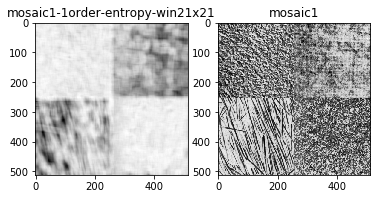

In [14]:
# save file and display
savename="{0}-1order-{1}-win{2}x{2}.png".format(get_basename(org_file1),
                                               feature_name,
                                               window_size)

cv2.imwrite(os.path.join(output_dir, savename), fimg1)

figure(fig_num)
fig_num += 1

subplot(1,2,1)
title(get_basename(savename))
imshow(fimg1,'gray')
subplot(1,2,2)
title(get_basename(org_file1))
imshow(img1,'gray')


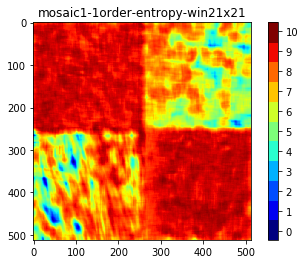

In [15]:
# colorbar display feature images
fig, ax = subplots()
cmap = get_cmap('jet')
cax = ax.imshow(fimg1, interpolation='nearest', cmap=cmap)
ax.set_title(get_basename(savename))
colorbar_index(ncolors=11,cmap=cmap)

# save colorbar figure
fig.savefig(os.path.join(output_dir, "cb-{0}".format(savename)))

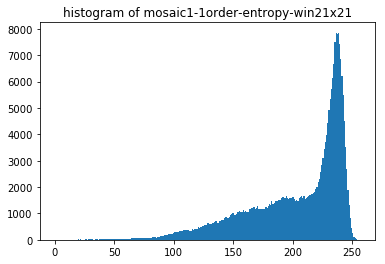

In [16]:
# histogram of feature image
figure(fig_num)
fig_num += 1

title("histogram of {0}".format(get_basename(savename)))
hist(fimg1.ravel(),256,[0,256])
show()

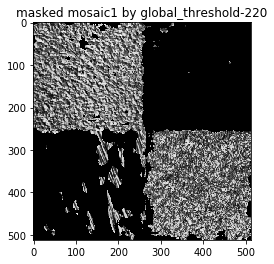

In [17]:
# Apply a global threshold to the feature image
masked_img1 = mask_featured_image(image=img1,
                                  feature_img=fimg1, 
                                  threshold=220)
figure(fig_num)
fig_num += 1

title("masked {0} by global_threshold-220".format(get_basename(org_file1)))
imshow(masked_img1,'gray')

In [18]:
# Now try to use 2-order GLCM to analyise the image
# first, requantize the image -
rqtz_img1 = requantize(img1, level_num=10)

# initialize parameters
weights = None 
ts = time.time()

glcm_img1 = construct_glcm_feature_img(gray_img=rqtz_img1, 
                                       win_order=10, 
                                       feature='entropy',
                                       glcm_type='isotropic', 
                                       weights=weights,
                                       fill_type='mirror', 
                                       norm=True, 
                                       symm=True, 
                                       stepsize=5)

print('Time cost of creating glcm entropy image: ', time.time() - ts)


Time cost of creating glcm entropy image:  249.69253826141357


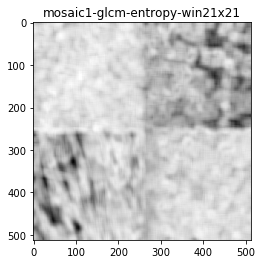

In [19]:
savename = "{0}-glcm-{1}-win{2}x{2}.png".format(get_basename(org_file1), 
                                                feature_name, 
                                                window_size)
figure(fig_num)
fig_num += 1
plt.title(get_basename(savename))
imshow(glcm_img1,'gray')

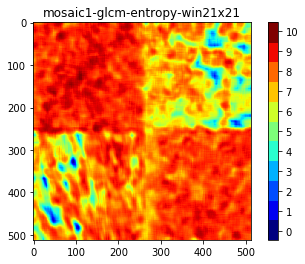

In [20]:
# colorbar display feature images
fig, ax = subplots()
cmap = get_cmap('jet')
cax = ax.imshow(glcm_img1, interpolation='nearest', cmap=cmap)
ax.set_title(get_basename(savename))
colorbar_index(ncolors=11,cmap=cmap)

# save colorbar figure
fig.savefig(os.path.join(output_dir, "cb-{0}".format(savename)))

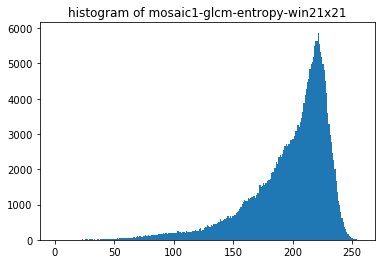

In [21]:
# histogram of this glcm feature image
figure(fig_num)
fig_num += 1

plt.title("histogram of {0}".format(get_basename(savename)))
hist(glcm_img1.ravel(),256,[0,256])
show()

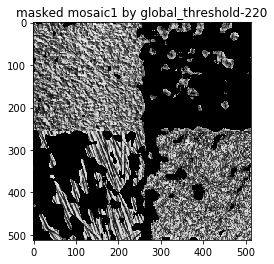

In [22]:
# Apply a global threshold to the feature image
masked_img2 = mask_featured_image(image=img1,
                                  feature_img=glcm_img1, 
                                  threshold=200)
figure(fig_num)
fig_num += 1

plt.title("masked {0} by global_threshold-220".format(get_basename(org_file1)))
imshow(masked_img2,'gray')

In [46]:
rqnt_sub1 = requantize(sub1,16)
glcm1 = get_glcm(rqnt_sub1, 'horizontal')

(16, 16)
{'max_prob': 0.013834635416666666, 'contrast': 13.986762152777779, 'dissimilarity': 3.0648871527777772, 'homogeneity': 0.25069119606719525, 'ASM': 0.0088405903474784182, 'energy': 0.09402441357157415, 'entropy': 4.8855459543871014, 'correlation': 0.45035809245135677, 'cluster_shade': 44.386961873278338, 'variance_i': 12.723522315790625, 'variance_j': 12.723522315790625, 'mean_i': 6.9458550347222214, 'mean_j': 6.9458550347222232}


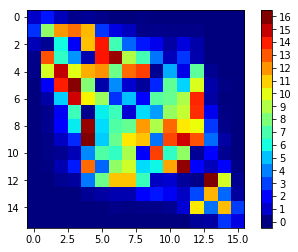

In [47]:
# colorbar display feature images
fig, ax = subplots()
cax = ax.imshow(glcm1, interpolation='nearest', cmap=cmap)
colorbar_index(ncolors=17,cmap=cmap)
print(glcm1.shape)
print(glcm_measures(glcm1,'all',True, True))

In [57]:
# try to using opensource API to compare the results with my own functions
from skimage.feature import greycomatrix, greycoprops
glcm = greycomatrix(sub1, [16], [0], levels=256, symmetric=True, normed=True)
print(glcm.shape)
print(greycoprops(glcm, 'ASM')[0, 0],greycoprops(glcm, 'contrast')[0, 0])


(256, 256, 1, 1)
0.000213769674301 7279.46007487
